# SpectralDNS

```{sidebar} Rayleigh-Bénard

![](https://raw.githack.com/spectralDNS/spectralutilities/master/movies/RB_200k_Warp.gif)
**Rayleigh-Bénard** convection computed with spectral accuracy using a [spectralDNS solver](https://github.com/spectralDNS/spectralDNS/blob/master/demo/RayleighBenard.py).
```

The [spectralDNS](https://github.com/spectralDNS) project revolves around
implementing high-performance flow solvers in [Python](https://www.python.org), which is a modern and very
high-level programming language. The project is supported through several grants from [King
Abdullahs University of Science and Technology](https://www.hpc.kaust.edu.sa),
granting access to some of the world's largest supercomputers. The work has
been presented at several conferences and as invited talks

  * [11'th International Conference on Scientific Computing and Applications](http://tianyuan.xmu.edu.cn/activities/19-20/ICSCA2019/index.html)

  * [International Conference on Computational Science and Engineering](https://cseconf2017.simula.no)

  * [I3MS Seminar Series of the Institute for Modeling and Simulation, 6 Nov 2017 RWTH AAchen University](https://www.aices.rwth-aachen.de/en/media-and-seminars/events/mortensen-seminar)

  * [Predictive Complex Computational Fluid Dynamics, KAUST, May 2017](https://pccfd.kaust.edu.sa/speaker?si=4)

  * [MekIT'17 National Conference on computational Mechanics, Trondheim, May 2017](http://arxiv.org/abs/1708.03188)

  * [EuroScipy, Cambridge, August 2015](https://www.euroscipy.org/2015/schedule/presentation/6/)

The *spectralDNS* project on github contains several repositories, each representing a smaller part of the overall project. The most important are presented beolw.

## spectralDNS

```{margin}
![](https://raw.githack.com/spectralDNS/spectralutilities/master/figures/strong_scaling_pencil_col.png)

**Strong scaling** of triply periodic Navier-Stokes solver on the Shaheen II supercomputer at KAUST.
```



The [spectralDNS](https://github.com/spectralDNS/spectralDNS) repository is home to several different pseudo-spectral Navier-Stokes and MagnetoHydroDynamics solvers. Most solvers are for triply periodic domains. The simplest possible Navier-Stokes solver is described by {% cite Mortensen2016 %}, who show that a highly efficient solver can be created using no more than 100 lines of code, using nothing more than standard
tools like *Numpy* and *MPI for Python*. The DNS solver has been tested for a
transitional Taylor-Green vortex using a computational box of size $2048^3$. Accuracy is, well spectral, and in benchmark tests on the Shaheen II supercomputer at KAUST it has been found to scale well up to 64,000 cores.
A state-of-the-art spectral channel flow solver that is making extensive use of *shenfun*, has been described by {% cite mortensen2017spectral %}. Turbulent flow at $Re_{\tau}=2000$ is shown in the movie below.

![](https://raw.githack.com/spectralDNS/spectralutilities/master/movies/Re2000_cropped.gif)

With colleagues at the Extreme Computing Research Center (ECRC), King Abdullah University of Science and Technology (KAUST), we have been using [spectralDNS](https://github.com/spectralDNS) to investigate time integration of Fourier pseudospectral Direct Numerical Simulations {cite}`ketcheson2020`. We investigate the use of higher‐order Runge‐Kutta pairs and automatic step size control based on local error estimation. We find that the fifth‐order accurate Runge‐Kutta pair of Bogacki and Shampine gives much greater accuracy at a significantly reduced computational cost.

## Shenfun

With the [shenfun](https://github.com/spectralDNS/shenfun) Python module
{cite}`shenfun` an
effort is made towards automating the implementation of the spectral Galerkin
method for simple tensor product domains, consisting of non-periodic and
periodic directions. The user interface to *shenfun* is intentionally made very
similar to [FEniCS](https://fenicsproject.org). Partial Differential Equations
are represented through weak variational forms and solved using efficient direct
solvers where available. MPI decomposition is achieved through the 
[mpi4py-fft](https://bitbucket.org/mpi4py/mpi4py-fft) module, and all developed solvers may,
with no additional effort, be run on supercomputers using thousands of
processors.

An introduction to *shenfun* is given in {cite}`shenfun`, on [readthedocs](https://shenfun.readthedocs.io)
and the recent paper {cite}`mortensen_joss`. Introduction to *mpi4py-fft*
is given [here](https://mpi4py-fft.readthedocs.io/en/latest/) and
in {cite}`mpi4py-fft_joss,jpdc_fft`. Further documentation is found at 

[![Documentation](https://readthedocs.org/projects/shenfun/badge/?version=latest)](https://shenfun.readthedocs.io/en/latest/)

Try shenfun in the computational cell below. Modify to own liking and run interactively.

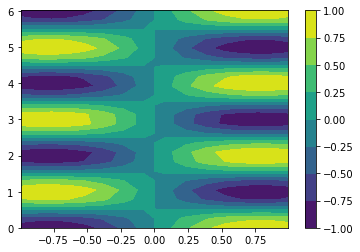

In [2]:
from sympy import symbols, cos, sin, pi
from shenfun import *
import matplotlib.pyplot as plt
%matplotlib inline

x, y = symbols("x,y")

C = Basis(20, 'Chebyshev')
F = Basis(24, 'Fourier', dtype='d')
T = TensorProductSpace(comm, (C, F))
u = project(sin(2*x)*cos(pi*y), T)
X = T.local_mesh(True)
plt.contourf(X[0], X[1], u.backward())
plt.colorbar()
plt.show()


 


## mpi4py-fft 

mpi4py-fft is a Python package for computing Fast Fourier Transforms (FFTs).
Large arrays are distributed and communications are handled under the hood by
MPI for Python (mpi4py). To distribute large arrays we are using a
[new and completely generic algorithm](https://arxiv.org/abs/1804.09536)
that allows for any index set of a multidimensional array to be distributed. We
can distribute just one index (a slab decomposition), two index sets (pencil
decomposition) or even more for higher-dimensional arrays.

mpi4py-fft comes with its own Python interface to the serial
[FFTW](http://www.fftw.org) library. This interface can be used
much like [pyfftw](https://hgomersall.github.io/pyFFTW), and even for
real-to-real transforms, like discrete cosine or sine transforms. Further documentation is found at

[![Documentation](https://readthedocs.org/projects/mpi4py-fft/badge/?version=latest)](https://mpi4py-fft.readthedocs.io/en/latest/)

Number of downloads from conda-forge:

[![Anaconda-Server Badge](https://anaconda.org/conda-forge/mpi4py-fft/badges/downloads.svg)](https://anaconda.org/conda-forge/mpi4py-fft)



## References

```{bibliography} ../../references.bib
:filter: docname in docnames
```